# Exploratory Data Analysis (EDA)

## Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Table#1 -- Contact Object
**This is an EDA for Table 'Contact Object'**
*Basic contact information about each Fellow*

In [3]:
#read the csv document
contact = pd.read_csv('DP- Contact Object 5.10.21.csv')

## 1) Check rows and cols

In [5]:
#contact.head()
# contact.info()
#contact.columns

## 1) conclusions:
- there are 1524 rows x 51 columns in this table
- Id is the primary key
- Datatype: object, float, int

***

## 2) Check missing data

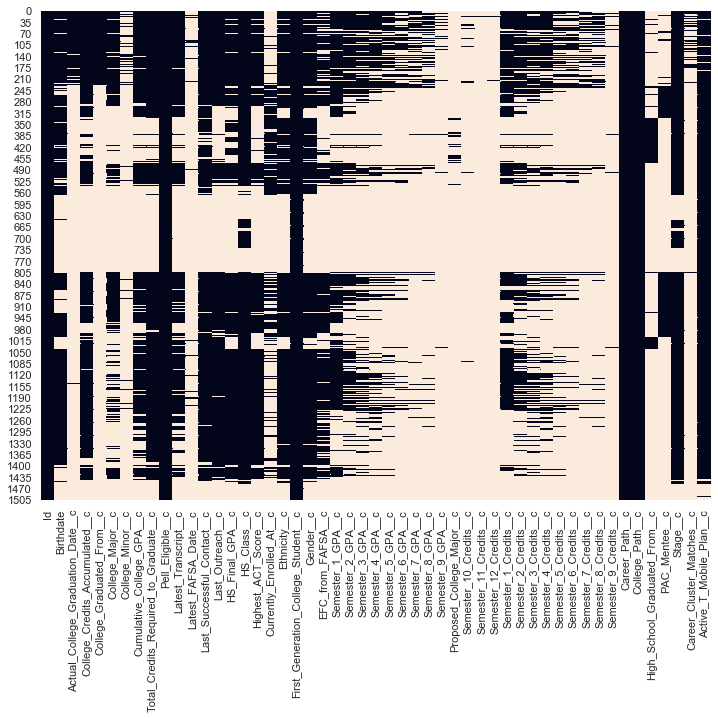

In [19]:
sns.set(rc={'figure.figsize':(12,9)}) # adjust figure size
sns.heatmap(contact.isnull(), cbar=False)

In [22]:
total = contact.isnull().sum().sort_values(ascending=False)
percent = (contact.isnull().sum()/contact.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data.head(5) 

,Total Missing,Percent
Semester_11_Credits__c,1522,0.998688
Semester_12_Credits__c,1517,0.995407
Semester_9_Credits__c,1497,0.982283
Semester_10_Credits__c,1491,0.978346
Latest_FAFSA_Date__c,1486,0.975066


## 2) conclusions:
- some cols (especially semester_credits) contain a lot of missing values (90%+)
- some fellows(students) lost most of the info

## 2) questions and further work:
- are semester_credits true missing values? Is it because those students are still in the program?

***

## 3) Basic Visualizations

### - Countplots
__[reference](https://seaborn.pydata.org/generated/seaborn.countplot.html)__

Text(0.5, 1.0, 'students in different ethnicities')

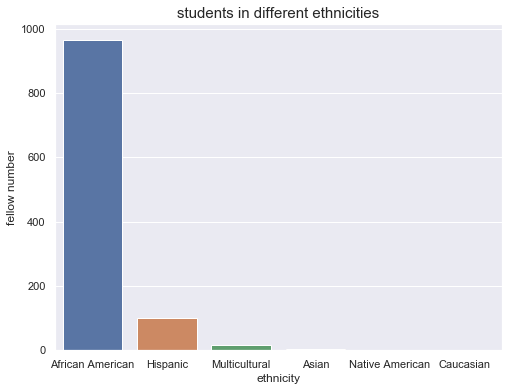

In [6]:
# how many fellows in each ethical group
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size
ax = sns.countplot(x="Ethnicity__c", data=contact)

plt.xlabel("ethnicity", fontsize= 12)
plt.ylabel("fellow number", fontsize= 12)
plt.title("students in different ethnicities", fontsize= 15)

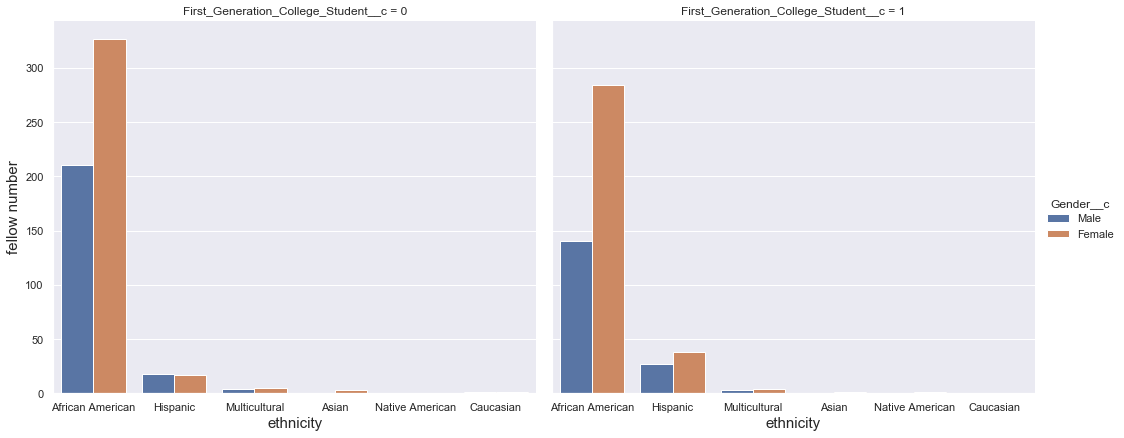

In [121]:
# fellow population distribution -- gender & ethnicity
sns.set(rc={'figure.figsize':(12,9)}) # adjust figure size
g = sns.catplot(x="Ethnicity__c", hue="Gender__c", col="First_Generation_College_Student__c",
                data=contact, kind="count",
                height=6, aspect=1.2);


g.set_xlabels('ethnicity', fontsize=15) # not set_label
g.set_ylabels('student number', fontsize=15)

### - Conclusions from countplot:
- most of the students are African Americans, Hispanic is the second most, very few are Native Americans or White
- first generation college student or not are pretty evenly distributed
- Female students are more than male students

### - Histograms
__[reference](https://seaborn.pydata.org/generated/seaborn.histplot.html)__

Text(0.5, 1.0, 'GPA distribution')

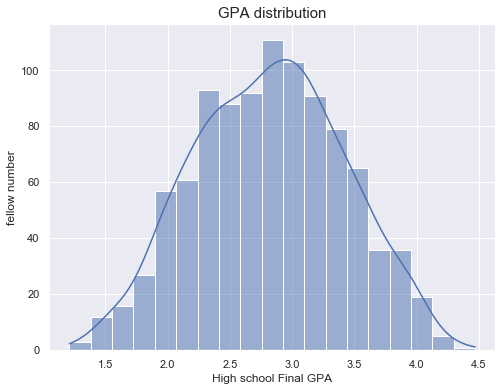

In [68]:
# this is a distribution of high school final GPA
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size
sns.histplot(data=contact, x="HS_Final_GPA__c", kde=True)
# replace with 'Highest_ACT_Score__c'

plt.xlabel("High school Final GPA", fontsize= 12)
plt.ylabel("student number", fontsize= 12)
plt.title("GPA distribution", fontsize= 15)

Text(0.5, 1.0, 'ACT distribution(gender Included)')

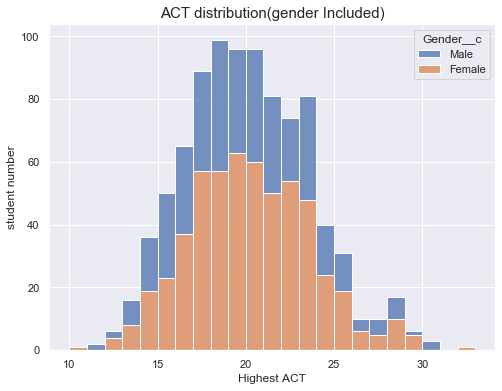

In [9]:
# this is a stack distribution of highest ACT score, male vs female
sns.histplot(data=contact, x="Highest_ACT_Score__c", hue="Gender__c", multiple="stack")
# replace with 'Ethnicity__c', 'First_Generation_College_Student__c', 'Active_T_Mobile_Plan__c'

plt.xlabel("Highest ACT", fontsize= 12)
plt.ylabel("student number", fontsize= 12)
plt.title("ACT distribution(gender Included)", fontsize= 15)

Text(0.5, 1.0, 'EFC number distribution')

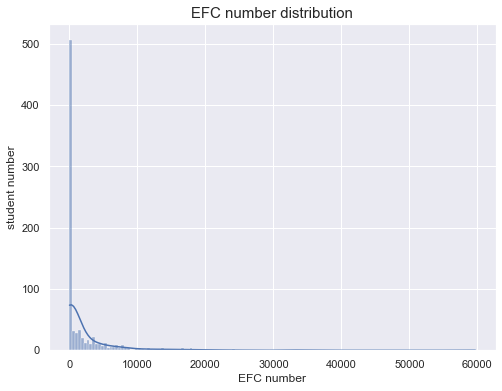

In [10]:
# this is a distribution of how much money family can contribute to college tuition
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size
sns.histplot(data=contact, x="EFC_from_FAFSA__c", kde=True)

plt.xlabel("EFC number", fontsize= 12)
plt.ylabel("student number", fontsize= 12)
plt.title("EFC number distribution", fontsize= 15)

#### An EFC number is the "expected family contribution", or the amount a family is expected to pay for their student's college education. It short, the EFC has an effect on how much federal grant money you will be given for college expenses.

### - Conclusions from histogram:
- the grades (ACT&GPA) are normally distributed
- The normal distribution is not affected greatly by gender, ethnics, first generation or not
- student who gets the lowest and highest ACT are both female
- most students have financial problems that their family cannot afford their college tuition, but there are some outliers

### - Boxplot
__[reference](https://seaborn.pydata.org/generated/seaborn.boxplot.html)__

Text(0.5, 1.0, 'highest ACT of each ethnical group')

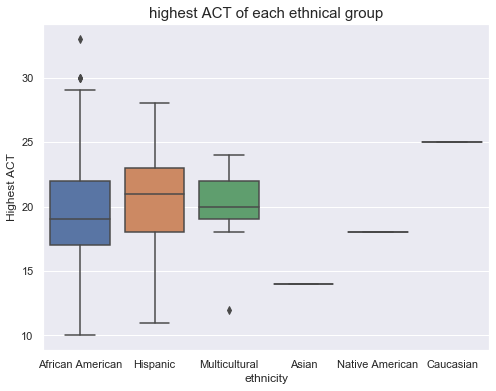

In [72]:
# high school final GPA in different ethnical groups 
sns.boxplot(x="Ethnicity__c", y="Highest_ACT_Score__c", data=contact)
# replace with 'Highest_ACT_Score__c','HS_Final_GPA__c'

plt.xlabel("ethnicity", fontsize= 12)
plt.ylabel("Highest ACT", fontsize= 12)
plt.title("highest ACT of each ethnical group", fontsize= 15)

Text(0.5, 1.0, 'ethnicity vs ACT (first generation college student Included)')

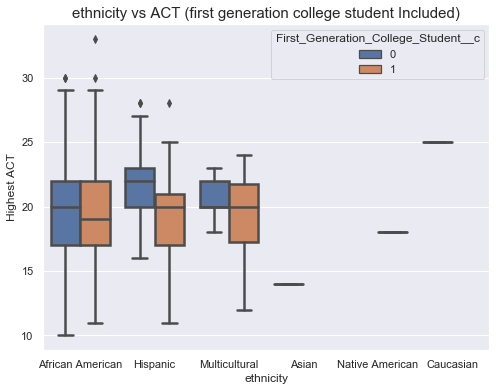

In [73]:
# highest ACT in different ethnical groups 
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size
sns.boxplot(x="Ethnicity__c", y="Highest_ACT_Score__c", hue="First_Generation_College_Student__c", data=contact, linewidth=2.5)

plt.xlabel("ethnicity", fontsize= 12)
plt.ylabel("Highest ACT", fontsize= 12)
plt.title("ethnicity vs ACT (first generation college student Included)", fontsize= 15)

### - Conclusions from boxplot:
- due to lack of data, only look into the first three ethnical groups
- hispanics have better academic performance
- first generation college students have better academic performance

### - Scatterplot
__[reference]( https://seaborn.pydata.org/generated/seaborn.boxplot.html)__

Text(0.5, 1.0, 'highest ACT VS high school final GPA')

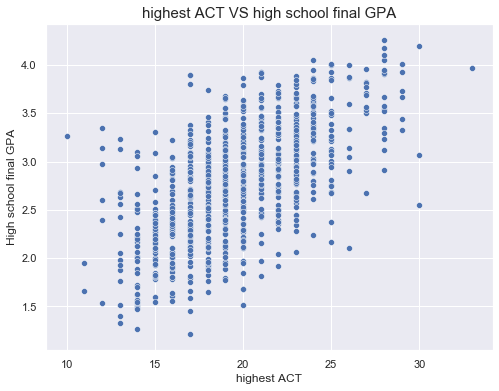

In [11]:
# ACT VS high school GPA
sns.scatterplot(data=contact, x="Highest_ACT_Score__c", y="HS_Final_GPA__c")

plt.xlabel("highest ACT", fontsize= 12)
plt.ylabel("High school final GPA", fontsize= 12)
plt.title("highest ACT VS high school final GPA", fontsize= 15)

Text(0.5, 1.0, 'credits VS GPA (semester 1)')

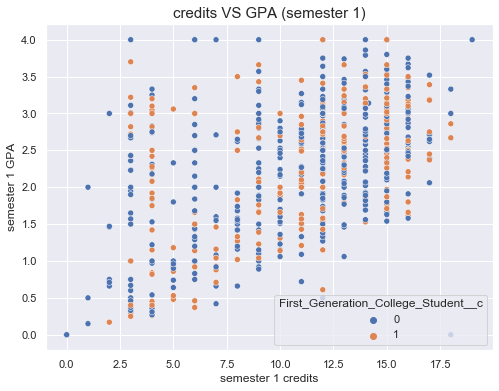

In [12]:
# credits taken VS college GPA
sns.scatterplot(data=contact, x="Semester_1_Credits__c", y="Semester_1_GPA__c", hue="First_Generation_College_Student__c")

plt.xlabel("semester 1 credits", fontsize= 12)
plt.ylabel("semester 1 GPA", fontsize= 12)
plt.title("credits VS GPA (semester 1)", fontsize= 15)

### - Conclusions from scatterplot:
- positive relationship between ACT and high school GPA
- in the first semester: more credits taken, higher GPA in general
- first generation college students work harder (6 first generation students get 4 credits vs 2 non-first generation get 4 credits)

***

# Table#2 -- Contact Note
**This is an EDA for Table 'Contact Note'**
*Documents each contact between coach and Fellow*

In [13]:
#read the csv document
contactNote = pd.read_csv('DP- Contact_Note_c 5.10.21.csv')

## 1) Check rows and cols

In [15]:
#contactNote.head()
# contactNote.info()
#contactNote.columns

## 1) conclusions:
- there are 25947 rows x 6 columns in this table
- Contact__c is the primary key
- Datatype: object, int(binary)

## 2) Check missing data

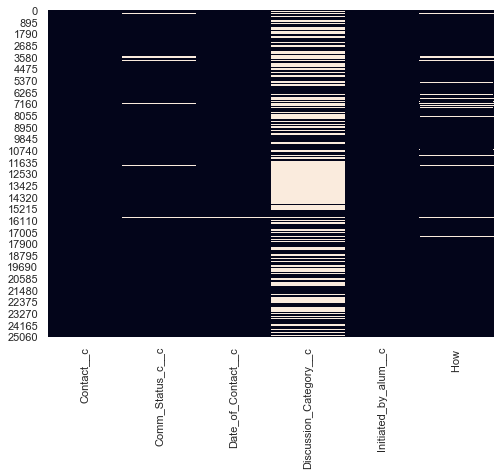

In [100]:
#sns.set(rc={'figure.figsize':(12,9)}) # adjust figure size
sns.heatmap(contactNote.isnull(), cbar=False)

In [102]:
total = contactNote.isnull().sum().sort_values(ascending=False)
percent = (contactNote.isnull().sum()/contactNote.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Discussion_Category__c,12524,0.482676
How,1036,0.039928
Comm_Status_c__c,492,0.018962
Date_of_Contact__c,28,0.001079
Initiated_by_alum__c,0,0.000000
Contact__c,0,0.000000


## 2) conclusions:
- some cols contain some missing values
- some fellows(students) lost many cols info

## 3) Basic Visualizations

### - Countplots
__[reference](https://seaborn.pydata.org/generated/seaborn.countplot.html)__

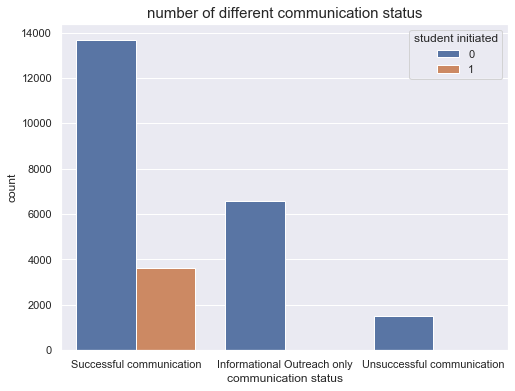

In [236]:
#  if contact between coach and student was successful
ax = sns.countplot(x="Comm_Status_c__c", hue='Initiated_by_alum__c', data=contactNote)

plt.xlabel("communication status", fontsize= 12)
plt.ylabel("count", fontsize= 12)
plt.title("number of different communication status", fontsize= 15)
plt.legend(title='student initiated', loc='upper right')
# 1--> student initiate the contact

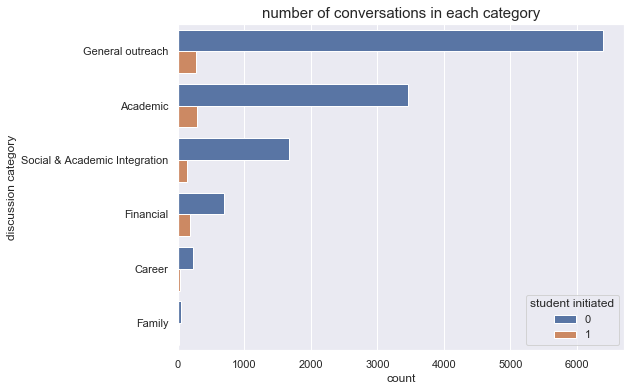

In [242]:
#  Nature of conversation
ax = sns.countplot(y="Discussion_Category__c", hue='Initiated_by_alum__c', data=contactNote,
                  order = contactNote['Discussion_Category__c'].value_counts().index) # ordered
#plt.xticks(rotation=20)

plt.ylabel("discussion category", fontsize= 12)
plt.xlabel("count", fontsize= 12)
plt.title("number of conversations in each category", fontsize= 15)
plt.legend(title='student initiated', loc='lower right')
# 1--> student initiate the contact

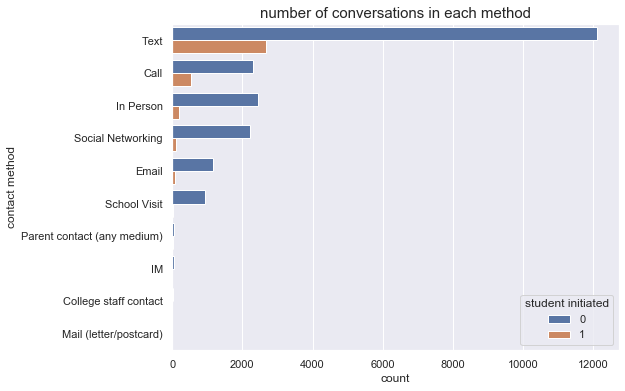

In [240]:
#  How did the coach and fellow make contact
ax = sns.countplot(y="How ", hue='Initiated_by_alum__c', data=contactNote,
                  order = contactNote['How '].value_counts().index) # ordered
#plt.xticks(rotation=45)

plt.ylabel("contact method", fontsize= 12)
plt.xlabel("count", fontsize= 12)
plt.title("number of conversations in each method", fontsize= 15)
plt.legend(title='student initiated', loc='lower right')
# 1--> student initiate the contact

## conclusion from countplot:
- all conversations initiated by students were successful
- the number of contacts initiated by a coach is way more than contacts initiated by a student
- students won't take the initiative to talk about career or family
- academic is the most common topic except for general outreach
- text is the most popular contact method

### - time series data
#### before plotting, extract and create two new variables -- year & month

In [147]:
contactNote['year'] = pd.DatetimeIndex(contactNote['Date_of_Contact__c']).year
contactNote['month'] = pd.DatetimeIndex(contactNote['Date_of_Contact__c']).month

contactNote.head()
# it is float type because due to NAs in this col

,Contact__c,Comm_Status_c__c,Date_of_Contact__c,Discussion_Category__c,Initiated_by_alum__c,How,year,month
0,00346000002iXe4AAE,Successful communication,9/7/2018 0:00,NaN,0,Social Networking,2018.0,9.0
1,00346000002iXdxAAE,Successful communication,10/10/2018 0:00,Academic,0,In Person,2018.0,10.0
2,0034600000iXkmFAAS,Successful communication,8/30/2018 0:00,Academic,0,Call,2018.0,8.0
3,00346000002iXduAAE,Successful communication,8/31/2018 0:00,Social & Academic Integration,0,Call,2018.0,8.0
4,0034600001EXcSPAA1,Successful communication,8/28/2018 0:00,Academic,0,Text,2018.0,8.0


Text(0.5, 1.0, 'number of conversations throug out years')

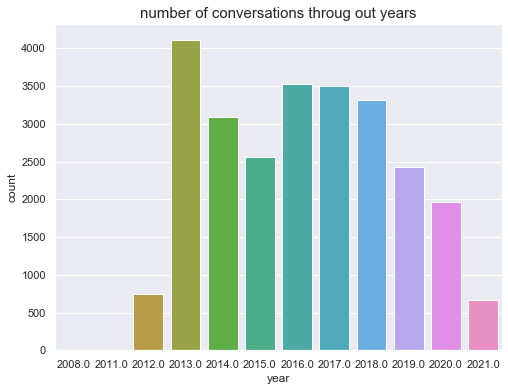

In [151]:
#  conversations through out years
ax = sns.countplot(x="year", data=contactNote)

plt.xlabel("year", fontsize= 12)
plt.ylabel("count", fontsize= 12)
plt.title("number of conversations throug out years", fontsize= 15)

Text(0.5, 1.0, 'number of conversations throug out months')

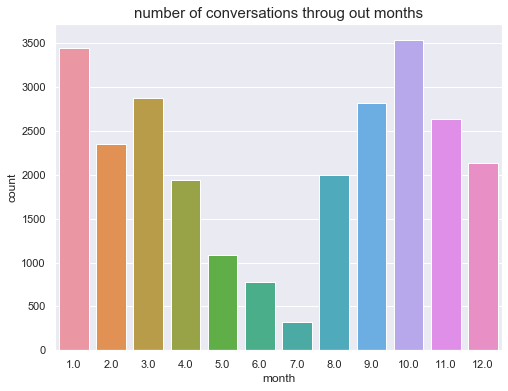

In [152]:
#  conversations through out months
ax = sns.countplot(x="month", data=contactNote)

plt.xlabel("month", fontsize= 12)
plt.ylabel("count", fontsize= 12)
plt.title("number of conversations throug out months", fontsize= 15)

## conclusion from time series data:
- the records are mostly between 2013-2020
- the contacts took place mostly during spring or fall semesters, not in the summer (July has the fewest contacts)

***

# Table#3 -- Course schedule
**This is an EDA for Table 'Course schedule'**
*Course details collected from Fellows*

In [12]:
#read the csv document
courseSchedule = pd.read_csv('DP- Course_Shedule_c 5.10.21.csv', encoding= 'unicode_escape')

## 1) Check rows and cols

In [17]:
# courseSchedule.head()
courseSchedule.info()
# courseSchedule.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101 entries, 0 to 5100
Data columns (total 12 columns):
Student__c              5101 non-null object
Id                      5101 non-null object
CreatedDate             5101 non-null object
Course__c               5081 non-null object
Course_End_Time__c      2125 non-null object
Course_Start_Time__c    2127 non-null object
Course_Title__c         5087 non-null object
Course_Type__c          3066 non-null object
Credit_Hours__c         4308 non-null float64
Gen_Ed_Category__c      1214 non-null object
Semester_Quarter__c     4660 non-null object
Date_Course_Taken__c    4405 non-null object
dtypes: float64(1), object(11)
memory usage: 478.3+ KB


In [174]:
uniqueCourse = courseSchedule['Course__c'].nunique(dropna=True)
print (f'the number of unique courses is {uniqueCourse}')

uniqueCourseTitle = courseSchedule['Course_Title__c'].nunique(dropna=True)
print (f'the number of unique courses titles is {uniqueCourseTitle}')

the number of unique courses is 3009
the number of unique courses titles is 2814


## 1) conclusions:
- there are 5101 rows x 12 columns in this table
- Id is the primary key
- Datatype: object, float
- course and course_title require dimension reduction (keep one or fewer categories?)
- semester_quarter needs to be cleaned up

## 2) Check missing data

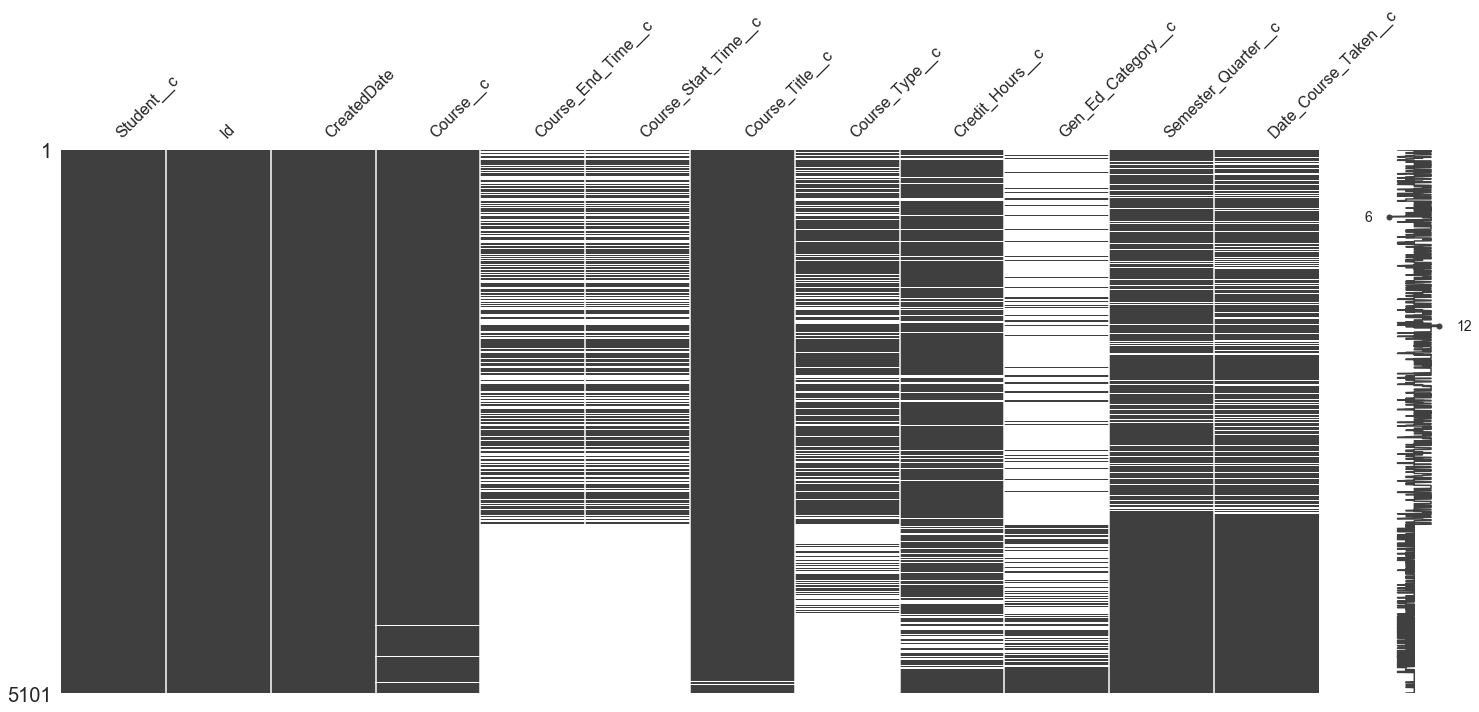

In [13]:
# sns.set(rc={'figure.figsize':(12,9)}) # adjust figure size
# sns.heatmap(courseSchedule.isnull(), cbar=False)

msno.matrix(courseSchedule)

In [166]:
total = courseSchedule.isnull().sum().sort_values(ascending=False)
percent = (courseSchedule.isnull().sum()/courseSchedule.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Gen_Ed_Category__c,3887,0.762007
Course_End_Time__c,2976,0.583415
Course_Start_Time__c,2974,0.583023
Course_Type__c,2035,0.398941
Credit_Hours__c,793,0.155460
Date_Course_Taken__c,696,0.136444
Semester_Quarter__c,441,0.086454
Course__c,20,0.003921
Course_Title__c,14,0.002745
CreatedDate,0,0.000000


## 2) conclusions:
- some cols contain a lot of missing values (50%+)

## 3) Basic Visualizations

### - Countplots
__[reference](https://seaborn.pydata.org/generated/seaborn.countplot.html)__

Text(0.5, 1.0, 'Course types')

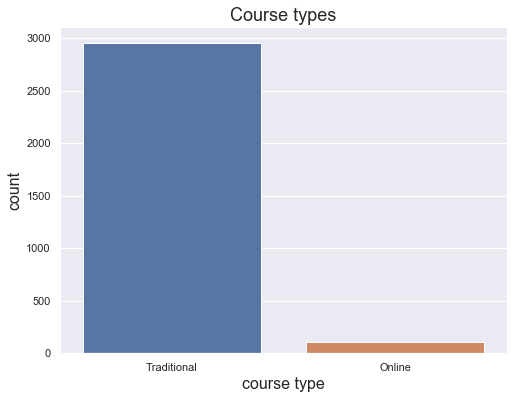

In [15]:
# different course types
# sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size
ax = sns.countplot(x="Course_Type__c", data=courseSchedule)

plt.xlabel("course type", fontsize= 16)
plt.ylabel("count", fontsize= 16)
plt.title("Course types", fontsize= 18)

### - Conclusions from countplot:
- most of the courses are traditional type

***

# Table#4 -- Enrollment
**This is an EDA for Table 'Enrollment**
*Tracking each Fellow's enrollment college*

In [5]:
#read the csv document
enrollment = pd.read_csv('DP- Enrollment_c 5.10.21.csv')

## 1) Check rows and cols

In [185]:
#enrollment.head()
enrollment.info()
#enrollment.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 11 columns):
Student__c               2061 non-null object
Id                       2061 non-null object
CreatedDate              2061 non-null object
College__c               2061 non-null object
Date_Last_Verified__c    1925 non-null object
Degree_Type__c           1998 non-null object
End_Date__c              1520 non-null object
Major_Text__c            162 non-null object
Start_Date__c            2002 non-null object
Status__c                2059 non-null object
Withdrawal_code__c       634 non-null object
dtypes: object(11)
memory usage: 177.2+ KB


In [195]:
# check the number of unique rows using 'Student__c'
len(enrollment['Student__c'].drop_duplicates())

1142

In [198]:
# check withdraw reasons
enrollment['Withdrawal_code__c'].unique()

array([nan, 'Summer Academics', 'Academic', 'Academic;Health',
       'Academic;Motivational', 'Family', 'Family;Motivational',
       'Unknown', 'Financial', 'Financial;Social', 'Academic;Financial',
       'Motivational', 'Academic;Family', 'Financial;Motivational',
       'Social', 'Family;Financial;Motivational', 'Health',
       'Family;Financial', 'Health;Motivational',
       'Academic;Financial;Motivational', 'Social;Racial Conflict',
       'Family;Health', 'Academic;Family;Financial',
       'Academic;Family;Motivational', 'Academic;Financial;Social',
       'Academic;Social', 'Suspended (Academic)', 'Expelled (Academic)',
       'Expelled (Behavioral)', 'Social;Suspended (Behavioral)',
       'Financial;Health;Motivational', 'Motivational;Social',
       'Family;Motivational;Social', 'Academic;Family;Financial;Health',
       'Academic;Family;Health', 'Family;Social',
       'Health;Motivational;Social;Racial Conflict',
       'Motivational;Racial Conflict', 'Suspended (Beha

## 1) conclusions:
- there are 2061 rows x 11 columns in this table
- though the number of studentID = the number of enrollmentID --> some students have more than one enrollment
- Id is the primary key
- Datatype: object
- for end_date and start_date --> need to create a new feature: end-start = duration
- 'College__c' is not a foreign key. useless?
- 'Status__c' may not accurate (according to the dictionary)
- 'Withdrawal_code__c' info overlapped --> split and count the times of each one has been mentioned

## 2) Check missing data

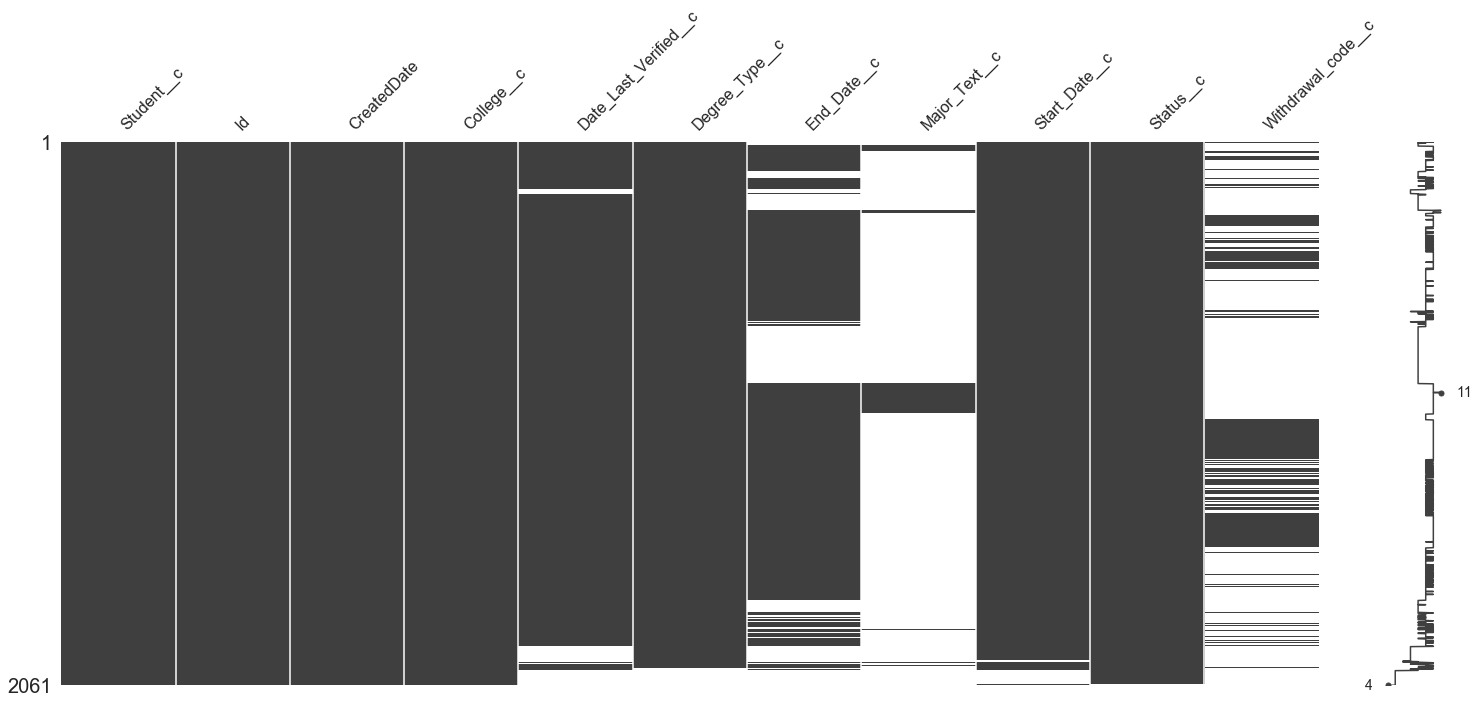

In [6]:
#sns.heatmap(enrollment.isnull(), cbar=False)
import missingno as msno
msno.matrix(enrollment)

In [193]:
total = enrollment.isnull().sum().sort_values(ascending=False)
percent = (enrollment.isnull().sum()/enrollment.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Major_Text__c,1899,0.921397
Withdrawal_code__c,1427,0.692382
End_Date__c,541,0.262494
Date_Last_Verified__c,136,0.065987
Degree_Type__c,63,0.030568
Start_Date__c,59,0.028627
Status__c,2,0.000970
College__c,0,0.000000
CreatedDate,0,0.000000
Id,0,0.000000


## 2) conclusions:
- some cols (especially Major_Text__c) contain a lot of missing values (90%+), but we can get the info through connecting this table with the table 'contact object' which contains the info about major (I tried through excel and found that some can match)

## 3) Basic Visualizations

### - Countplots
__[reference](https://seaborn.pydata.org/generated/seaborn.countplot.html)__

Text(0.5, 1.0, 'Degree types')

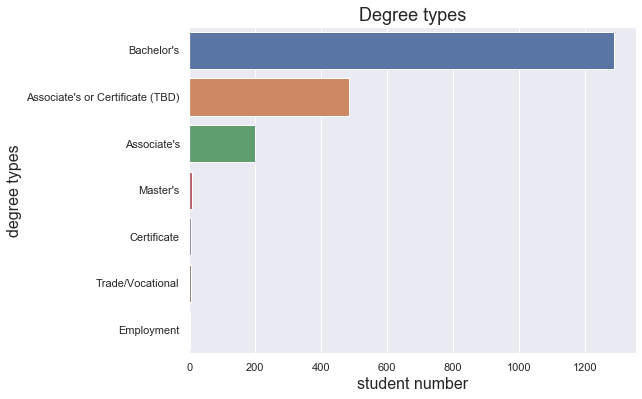

In [9]:
# degree types
ax = sns.countplot(y="Degree_Type__c", 
                   order = enrollment['Degree_Type__c'].value_counts().index,
                   data=enrollment)

#plt.xticks(rotation=45)
plt.ylabel("degree types", fontsize= 16)
plt.xlabel("student number", fontsize= 16)
plt.title("Degree types", fontsize= 18)

Text(0.5, 1.0, 'Student status')

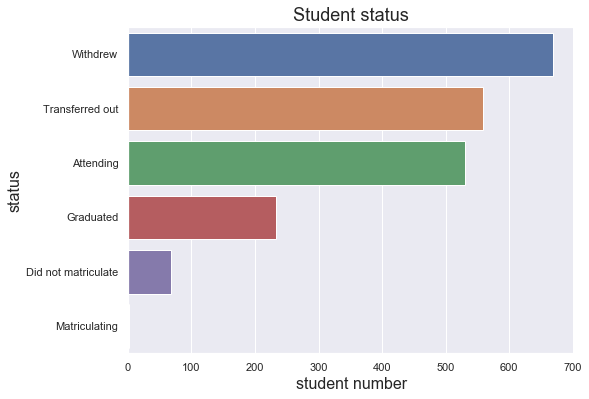

In [10]:
# status
ax = sns.countplot(y="Status__c", 
                   order = enrollment['Status__c'].value_counts().index,
                   data=enrollment)

#plt.xticks(rotation=45)
plt.ylabel("status", fontsize= 16)
plt.xlabel("student number", fontsize= 16)
plt.title("Student status", fontsize= 18)

## 3) conclusions:
- most students are pursuing bachelor's degree
- very few are pursuing Master or certificate(decided)

***

# Table#5 -- Support
**This is an EDA for Table 'Support'**
*Data tracking additional supports for Fellows for one-year (2018)*

In [19]:
#read the csv document
support = pd.read_csv('DP- Academic_Support_c 5.10.21.csv')

## 1) Check rows and cols

In [217]:
#support.head()
support.info()
#support.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
Student__c             259 non-null object
Id                     259 non-null object
CreatedDate            259 non-null object
Location__c            259 non-null object
Role__c                259 non-null object
Purpose_of_Visit__c    259 non-null object
Course_type__c         255 non-null object
dtypes: object(7)
memory usage: 14.3+ KB


In [227]:
# check purpose of visit
support['Purpose_of_Visit__c'].unique()

array(['Help with homework to be handed in', 'Other',
       'Study for an upcoming quiz or test', 'Career advice or planning',
       'Academic_advice_or_planning', 'General life counseling',
       'Revise or edit a paper', 'Review past homework, quizzes or tests'],
      dtype=object)

## 1) conclusions:
- there are 259 rows x 7 columns in this table
- Id is the primary key
- Datatype: object

## 2) Check missing data

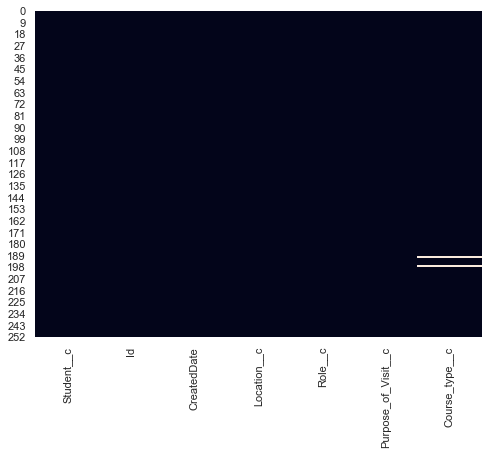

In [218]:
sns.heatmap(support.isnull(), cbar=False)

In [219]:
total = support.isnull().sum().sort_values(ascending=False)
percent = (support.isnull().sum()/support.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Course_type__c,4,0.015444
Purpose_of_Visit__c,0,0.000000
Role__c,0,0.000000
Location__c,0,0.000000
CreatedDate,0,0.000000
Id,0,0.000000
Student__c,0,0.000000


## 2) conclusions:
- only 4 missing values in course type

## 3) Basic Visualizations
- mainly categorical variables, plot some countplots

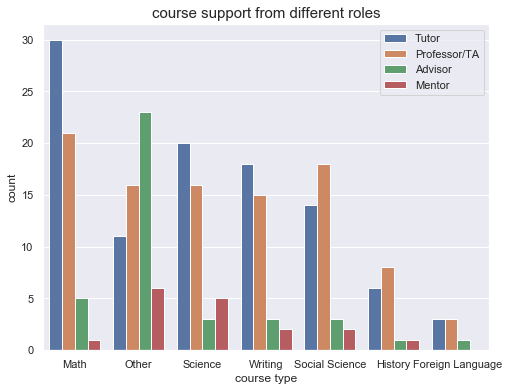

In [225]:
# course support
ax = sns.countplot(x="Course_type__c", hue='Role__c', 
                   order = support['Course_type__c'].value_counts().index,
                   data=support)

plt.xlabel("course type", fontsize= 12)
plt.ylabel("count", fontsize= 12)
plt.title("course support from different roles", fontsize= 15)
plt.legend(loc='upper right')

Text(0.5, 1.0, 'purpose of visit')

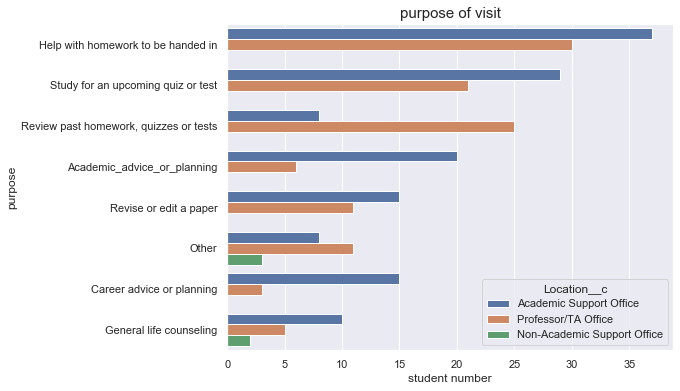

In [247]:
# purpose of visit
ax = sns.countplot(y="Purpose_of_Visit__c", hue='Location__c',
                   order = support['Purpose_of_Visit__c'].value_counts().index,
                   data=support)

plt.ylabel("purpose", fontsize= 12)
plt.xlabel("student number", fontsize= 12)
plt.title("purpose of visit", fontsize= 15)
#plt.legend(loc='upper right')

## 3) conclusions:
- students needs more help on math and science than social science or humanity classes. For math and science, they prefer to ask tutor and prof for help. For others, they prefer to talk to their advisor.
- Foreign language is the least popular subject when it comes to asking for out-of-class help
- Students tend to ask for help before turning in assignment or taking a test
- when it comes to reviewing a test, they tend to ask prof for help
- they go to a non-academic support office only when they want to ask for general life counseling or for other purpose. 

# Table#6 -- Survey Response
**This is an EDA for Table 'Survey_Response'**
*Data pulled from our Salesforce based survey. First data collected Fall 2020.*

In [21]:
#read the csv document
surveyResponse = pd.read_csv('DP- Survey_Response_c 5.10.21.csv', encoding= 'unicode_escape')

## 1) Check rows and cols

In [23]:
# surveyResponse.head()
# surveyResponse.info()
# surveyResponse.columns

In [252]:
# check unique students who took the survey
uniqueContact = surveyResponse['Contact__c'].nunique(dropna=True)
print (f'the number of unique contact is {uniqueContact}')

the number of unique contact is 135


In [256]:
# some students took the survey several times in a short time (within a few days) but submit different answers
surveyResponse.loc[surveyResponse['Contact__c'] == '0034p00001f3nlWAAQ']

,Contact__c,Id,CreatedDate,19. The key to academic success in college is:,"12.Think about last month. In an average week, how many times did you participate in extracurricular activities?",18.How true is the statement: I am able to afford all my expenses,9.How True is the statement: I am confident that I can succeed in college,25.Please select the statement that best describes your status for your Alumni Coordinator right now,3. How true is the statement: I feel accepted by other students on campus,1. How true is the statement: I feel at-home on campus,...,22. The key to success in college courses like math and science is:,Survey__c,"15. Think about last month. In an average week, how many hours did you expand your education in any manner?",9. How True is the statement: I am confident that I can achieve financial independence,8. How True is the statement: I am happy at this point in my life,20. How true is the statement: I am able to find a quiet place to unwind when I need it,5. How true is the statement: I feel like I have a plan to reach my goals,"16. Think about last month. In an average week, how many hours did you committment to self-improvement? (reading, course work, meditation )","14. Think about last month. In an average week, how many times were you absent from work or training?",KPI_Metric_2__c
20,0034p00001f3nlWAAQ,a1T4p000002ttaTEAQ,9/9/2020 21:15,Equal parts being smart and hard work,None,Neither True Nor False,Mostly True,"I'm ok, but let's check in as usual.",Neither True Nor False,Mostly True,...,Equal parts being smart and hard work,College Success Survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00
33,0034p00001f3nlWAAQ,a1T4p000002ttfTEAQ,9/10/2020 16:39,Equal parts being smart and hard work,None,Neither True Nor False,Very True,"I'm ok, but let's check in as usual.",Neither True Nor False,Mostly True,...,Equal parts being smart and hard work,College Success Survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75
40,0034p00001f3nlWAAQ,a1T4p000002tthUEAQ,9/10/2020 21:04,Equal parts being smart and hard work,None,Neither True Nor False,Very True,"I'm ok, but let's check in as usual.",Mostly True,Mostly True,...,Equal parts being smart and hard work,College Success Survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50


## 1) conclusions:
- there are 589 rows x 37 columns in this table
- Id is the primary key
- Datatype: float, object
- some students took the survey several times in a short time giving different answers

## 2) Check missing data

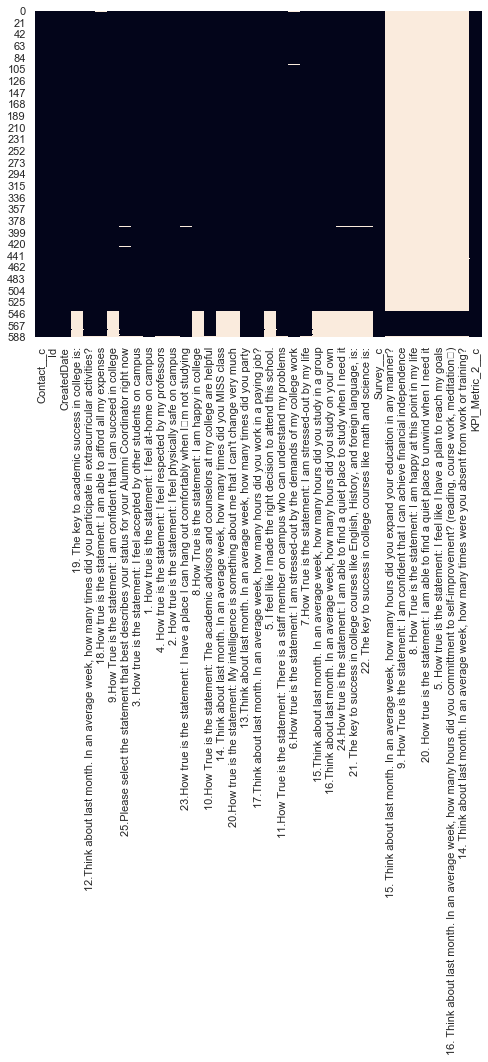

In [260]:
sns.heatmap(surveyResponse.isnull(), cbar=False)

## 2) conclusion:
- for the last a few couples of surveys, questions 15,9,8,20,5,16,14 are changed

## 3) Basic Visualizations

### - Boxplot
__[reference](https://seaborn.pydata.org/generated/seaborn.boxplot.html)__

Text(0.5, 1.0, 'boxplot for KPI metric')

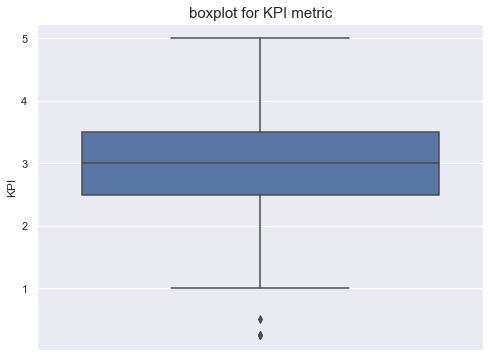

In [28]:
# KPI
sns.boxplot(y="KPI_Metric_2__c", data=surveyResponse)

plt.ylabel("KPI", fontsize= 12)
plt.title("boxplot for KPI metric", fontsize= 15)

#### key performance indicator (KPI) is a type of performance measurement. KPIs evaluate the success of an organization or of a particular activity in which it engages.

## 3) conclusion:
- I guess the KPI is calculated from the survey to indicate student success. The distribution is pretty normal. The median is around 3. The highest score is 5, while the lowest score is around .25.

***

# Table#7 --  App Response
**This is an EDA for Table '*App Response'**
*Data pulled from the UtmostU App monthy survey. The questions shifted over time. Data collected 2017 to Spring 2020.*

In [29]:
#read the csv document
AppSurvey = pd.read_csv('DP- App-Survey_c 5.10.21.csv')

## 1) Check rows and cols

In [31]:
# AppSurvey.head()
# AppSurvey.info()
# AppSurvey.columns

In [32]:
# check unique students who took the survey
uniqueStudent = AppSurvey['Student__c'].nunique(dropna=True)
print (f'the number of unique student is {uniqueStudent}')

the number of unique student is 297


In [34]:
# many students took the survey many times
# the student '0034600000B1BvoAAF' took the survey 21 in total.
AppSurvey.loc[AppSurvey['Student__c'] == '0034600000B1BvoAAF']

,Student__c,Id,IsDeleted,Name,CreatedDate,1. How true is the statement: I feel at-home on campus,2. How true is the statement: I feel physically safe on campus,3. How true is the statement: I feel accepted by other students on campus,4. How true is the statement: I feel respected by my professors,5. I feel like I made the right decision to attend this school,...,22. The key to success in college courses like math and science is,22.How true is the statement: I am able to find a quiet place to study when I need it,"15.Think about last month. In an average week, how many hours did you study in a group.3","23. The key to success in college courses like English, History, and language, is",23.Please select the statement that best describes your status for your Alumni Coordinator right now,23.How true is the statement: I have a place I can hang out comfortably when I?m not studying,"15.Think about last month. In an average week, how many hours did you study in a group.4",24.How true is the statement: I am able to find a quiet place to study when I need it,"15.Think about last month. In an average week, how many hours did you study in a group.5",25.Please select the statement that best describes your status for your Alumni Coordinator right now
25,0034600000B1BvoAAF,a0c46000002ZNjTAAW,0,New Survey 2017-09-05 19:01,9/5/17 19:00,1.How true is the statement: I feel at-home on...,2. How true is the statement: I feel physicall...,3. How true is the statement: I feel accepted ...,4. How true is the statement: I feel respected...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,0034600000B1BvoAAF,a0c46000003nvIYAAY,0,Student Survey 2017-09-10 21:56,9/10/17 21:56,1. How true is the statement: I feel at-home o...,2. How true is the statement: I feel physicall...,3. How true is the statement: I feel accepted...,4. How true is the statement: I feel respecte...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1700,0034600000B1BvoAAF,a0c46000005E6QEAA0,0,Student Survey 2018-01-10 14:58,1/10/18 14:57,1. How true is the statement: I feel at-home o...,2. How true is the statement: I feel physicall...,3. How true is the statement: I feel accepted...,4. How true is the statement: I feel respecte...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,0034600000B1BvoAAF,a0c4600000ApAmiAAF,0,Student Survey 2018-12-12 19:00,12/12/18 18:59,1. How true is the statement: I feel at-home o...,2. How true is the statement: I feel physicall...,3. How true is the statement: I feel accepted...,4. How true is the statement: I feel respecte...,5. I feel like I made the right decision to at...,...,22. The key to success in college courses like...,NaN,NaN,NaN,NaN,23.How true is the statement: I have a place I...,NaN,24.How true is the statement: I am able to fi...,NaN,25.Please select the statement that best descr...
1963,0034600000B1BvoAAF,a0c4600000B4dDDAAZ,0,Student Survey 2019-03-26 13:58,3/26/19 13:58,1. How true is the statement: I feel at-home o...,2. How true is the statement: I feel physicall...,3. How true is the statement: I feel accepted...,4. How true is the statement: I feel respecte...,5. I feel like I made the right decision to at...,...,22. The key to success in college courses like...,NaN,NaN,NaN,NaN,23.How true is the statement: I have a place I...,NaN,24.How true is the statement: I am able to fi...,NaN,25.Please select the statement that best descr...
1964,0034600000B1BvoAAF,a0c4p00000BfD17AAF,0,Student Survey 2019-09-09 21:57,9/9/19 21:58,1. How true is the statement: I feel at-home o...,2. How true is the statement: I feel physicall...,3. How true is the statement: I feel accepted...,4. How true is the statement: I feel respecte...,5. I feel like I made the right decision to at...,...,22. The key to success in college courses like...,NaN,NaN,NaN,NaN,23.How true is the statement: I have a place I...,NaN,24.How true is the statement: I am able to fi...,NaN,25.Please select the statement that best descr...
1965,0034600000B1BvoAAF,a0c4p00000BfDBu

## 1) conclusion:
- there are 3455 rows x 65 columns in this table
- Id is the primary key
- Datatype: object
- some students took the survey several times in a short time giving different answers
- it contains more info from 2017-2020, but needs to be cleaned (use regex to extract answers)
- many students take this svurvey many times, some submission dates are very close

## 2) Check missing data

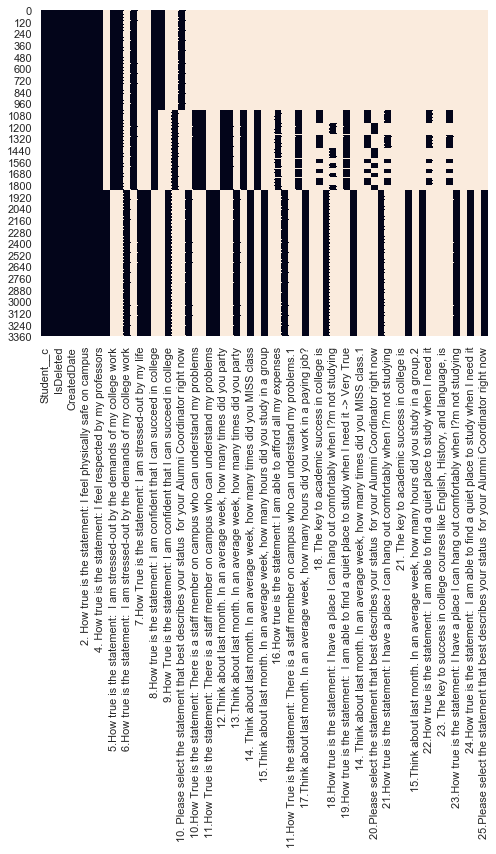

In [35]:
sns.heatmap(AppSurvey.isnull(), cbar=False)

## 2) conclusions:
- some questions are repeated with no answers
- need to reorganize the table

***

# Table#8 -- programming
**This is an EDA for Table 'programming'**
*Documents the support programs a Fellows engaged with (Emergency Funds; Scholarships; Recovery Credits))*

In [263]:
#read the csv document
programming = pd.read_csv('DP- UtmostU_Programming_c 5.10.21.csv')

## 1) Check rows and cols

In [269]:
# programming.head()
# programming.info()
# programming.columns

In [268]:
# check unique students are in the program
uniqueSturent = programming['Student__c'].nunique(dropna=True) # note NAs
print (f'the number of unique students is {uniqueSturent}')

the number of unique students is 222


## 1) conclusions:
- there are 335 rows x 9 columns in this table
- Id is the primary key
- Datatype: num, str
- some students are in the program several times?
- don't quite understand... summer program & non-summer program? see the original table
- only summer school has course location
- only summer school prior 2020 have credits earned (but outliers)
- need to reorganize the columns...

## 2) Check missing data

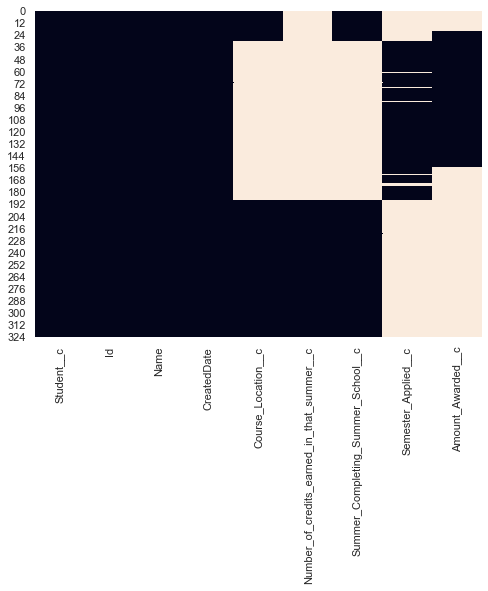

In [270]:
sns.heatmap(programming.isnull(), cbar=False)

***